## Imports

In [104]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
COFFEE_SHOP_DATA = "../data/Coffee_shop_data.xlsx"
POPULATION_DATA = "../data/population.csv"

## Data injection & Analysis

In [20]:
coffee_df = pd.read_excel(COFFEE_SHOP_DATA)
population_df = pd.read_csv(POPULATION_DATA, skiprows=[0])

In [21]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
747,748,Coffee Coziness,35 Prentice Center,Burbank,California,91520,626-601-9763,4.01,Female,80753,5.03765
579,580,Caffeine Communion,5 Granby Junction,Carlsbad,California,92013,760-425-8850,4.25,Female,88951,5.75755
256,257,Caffeine Confluence,2 Kennedy Drive,Bakersfield,California,93305,805-262-4326,4.50,Male,82664,5.18120
504,505,Caffeine Communion,465 Lawn Center,Glendale,California,91205,818-444-8163,4.40,Female,81057,5.16485
653,654,Steamy Moments,1 Mallory Pass,Orange,California,92867,949-738-2171,4.43,Male,74340,4.49500
765,766,Brewed Dreamscape,70 Brown Terrace,Santa Barbara,California,93106,805-960-3545,1.98,Female,77104,4.87320
422,423,Latte Landmark,384 Pearson Road,Sacramento,California,94250,916-480-3593,4.35,Female,74226,5.01530
322,323,Java Joie de Vivre,5723 Golf View Court,Los Angeles,California,90094,323-410-5164,1.36,Female,81405,4.93025
152,153,Bean Beacon,483 Mayer Place,Irvine,California,92619,949-373-9079,4.96,Male,73110,4.45550
558,559,Java Joyhouse,4 Bowman Hill,Sacramento,California,94245,916-439-9627,1.31,Male,78988,4.98540


In [23]:
population_df.sample(10)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1646,8600000US96071,ZCTA5 96071,1,Total population,67,NaN,23,34,7,2,1,0,0
261,8600000US91711,ZCTA5 91711,1,Total population,11868,NaN,2971,3972,1956,1736,792,296,145
1148,8600000US95051,ZCTA5 95051,1,Total population,20230,NaN,4646,6232,4034,3222,1213,523,360
1680,8600000US96120,ZCTA5 96120,1,Total population,393,NaN,100,168,46,38,24,11,6
999,8600000US94526,ZCTA5 94526,1,Total population,11781,NaN,2324,4292,1990,2085,829,194,67
638,8600000US92887,ZCTA5 92887,1,Total population,6699,NaN,878,2028,1398,1525,607,189,74
842,8600000US93638,ZCTA5 93638,1,Total population,11231,NaN,1241,2001,1529,1777,1653,1178,1852
289,8600000US91768,ZCTA5 91768,1,Total population,7885,NaN,1091,1533,1234,1346,1082,657,942
1586,8600000US95984,ZCTA5 95984,1,Total population,61,NaN,18,31,11,0,0,0,1
246,8600000US91504,ZCTA5 91504,1,Total population,9180,NaN,2165,2798,1627,1558,656,239,137


In [26]:
## Calculating number of instances in each data frame

print(f"Coffee df has {coffee_df.shape[0]} rows and {coffee_df.shape[1]} columns")
print(f"Population df has {population_df.shape[0]} rows and {population_df.shape[1]} columns")

Coffee df has 1000 rows and 11 columns
Population df has 1705 rows and 13 columns


In [27]:
## Checking the column names of each data frame

coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price'],
      dtype='object')

In [28]:
population_df.columns

Index(['Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [31]:
## Overview of the data

coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [33]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography                          1705 non-null   object 
 1   Label for GEO_ID                   1705 non-null   object 
 2   Race/Ethnic Group                  1705 non-null   int64  
 3   Population Groups                  1705 non-null   object 
 4   Total                              1705 non-null   int64  
 5   Errata of Total                    0 non-null      float64
 6   Total!!1-person household          1705 non-null   int64  
 7   Total!!2-person household          1705 non-null   int64  
 8   Total!!3-person household          1705 non-null   int64  
 9   Total!!4-person household          1705 non-null   int64  
 10  Total!!5-person household          1705 non-null   int64  
 11  Total!!6-person household          1705 non-null   int64

- 'Errate of total' has 0 non-null values

In [34]:
## Statistical summary

In [35]:
coffee_df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


 - Avg. Latte price is \$5.06
 - Cheapest latte is \\$3.09 and costliest is \\$6.48
 - Coffee shops have an avg rating of 3.78

In [36]:
population_df.describe()

,Race/Ethnic Group,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
count,1705.0,1705.000000,0.0,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,1.0,7380.679179,NaN,1719.078592,2144.630499,1199.246921,1105.011144,610.421114,297.739589,304.551320
std,0.0,6834.537992,NaN,1883.978056,1996.729629,1155.478884,1119.177945,694.102841,388.344813,515.173094
min,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,766.000000,NaN,188.000000,275.000000,105.000000,78.000000,42.000000,18.000000,11.000000
50%,1.0,5898.000000,NaN,1159.000000,1708.000000,932.000000,787.000000,369.000000,139.000000,86.000000
75%,1.0,12614.000000,NaN,2685.000000,3591.000000,2015.000000,1838.000000,968.000000,437.000000,377.000000
max,1.0,33342.000000,NaN,19444.000000,9845.000000,5563.000000,5604.000000,4118.000000,2491.000000,4467.000000


- Avg population is 7380M
- minimum population is 0.. thats interesting
- maximum population is 33342M
- Avg. population:
    - 1 person household = 1819M
    - 2 person household = 2144M
    - 3 person household = 1199M
    - 4 person household = 1105M
    - 5 person household = 610M
    - 6 person household = 297M
    - 7 person household = 304M
- There is high degree of variability within the dataset

In [37]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
983,984,Steamy Moments,86 Northland Park,San Jose,California,95150,408-978-6232,4.48,Female,88036,5.15580
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.70,Male,86394,4.15000
523,524,The Roast Refinery,3 Chinook Lane,Huntington Beach,California,92648,562-358-7586,4.00,Female,72745,4.84125
245,246,The Roast Refinery,608 Mcguire Point,San Francisco,California,94137,415-102-7250,4.96,Female,77404,4.71820
761,762,Bean Brilliance,24 Old Gate Street,Inglewood,California,90310,310-971-5708,4.37,Female,87586,5.14330
792,793,Coffee Coziness,6496 Village Green Crossing,Los Angeles,California,90076,323-951-3928,4.04,Female,76801,4.46005
935,936,Sip & Stories,351 Sauthoff Pass,Huntington Beach,California,92648,714-197-0461,4.74,Female,72745,4.88325
155,156,Espresso Elegance,1 Cherokee Center,Santa Rosa,California,95405,707-605-5098,4.58,Female,87334,5.33070
214,215,Mug Manor,96557 Forster Point,Los Angeles,California,90010,213-606-1916,1.94,Male,80745,5.22725
559,560,Frothy Fusion,6648 Di Loreto Alley,Bakersfield,California,93381,661-212-2673,3.50,Female,72725,3.99000


In [39]:
coffee_df['State'].value_counts()

State
California    1000
Name: count, dtype: int64

All the coffee shops are in the state california

In [42]:
len(coffee_df['City'].value_counts())

64

The California coffee shop dataset encompasses information from 64 cities across the state.

Text(0.5, 1.0, 'Top 10 Cities with most coffee shops')

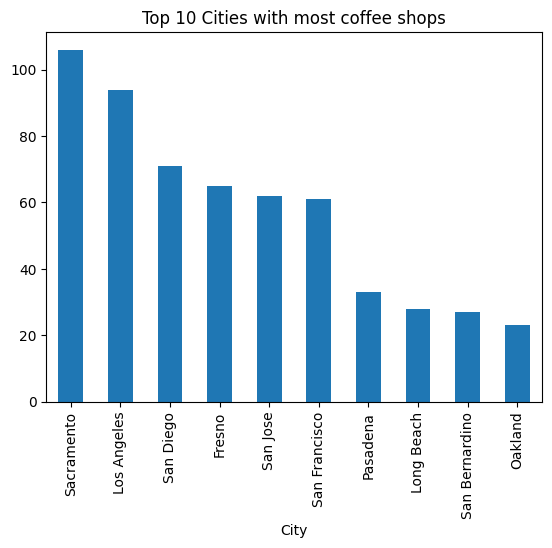

In [49]:
ax = coffee_df['City'].value_counts().head(10).plot(kind='bar')
ax.set_title("Top 10 Cities with most coffee shops")

In [65]:
coffee_df.sort_values(by="Latte Price", ascending=False).head(10)[['Business Name','City','Latte Price']]

,Business Name,City,Latte Price
995,Sip & Stories,San Bernardino,6.48000
367,Urban Brewtropolis,Palo Alto,5.87770
463,The Roast Refinery,Santa Clara,5.85815
417,Coffee Coziness,Palo Alto,5.81570
938,Steamy Moments,Long Beach,5.81020
97,Brewed Beauty,Long Beach,5.79420
736,Cup of Comfort,Pasadena,5.79105
486,Perk Paradise,Corona,5.77675
188,Mug Magic,Santa Cruz,5.77595
661,Cup of Comfort,Corona,5.77075


These are the top 10 costiliest lattes

In [66]:
coffee_df['Gender majority'].value_counts()

Gender majority
Male      511
Female    489
Name: count, dtype: int64

<Axes: xlabel='Gender majority', ylabel='count'>

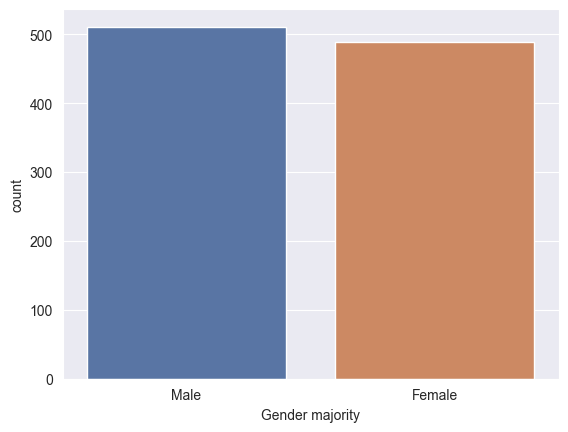

In [78]:
sns.set_style('darkgrid')
sns.countplot(data=coffee_df, x="Gender majority", palette="deep")


In [79]:
population_df.sample(5)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1319,8600000US95443,ZCTA5 95443,1,Total population,126,NaN,49,57,11,8,1,0,0
1431,8600000US95636,ZCTA5 95636,1,Total population,445,NaN,106,190,55,50,27,9,8
290,8600000US91770,ZCTA5 91770,1,Total population,16588,NaN,2063,3336,3173,3128,2126,1261,1501
153,8600000US90744,ZCTA5 90744,1,Total population,13999,NaN,1909,2441,2241,2617,2139,1264,1388
913,8600000US94019,ZCTA5 94019,1,Total population,6675,NaN,1564,2360,1018,905,371,178,279


In [86]:
population_df.sort_values(by="Total",ascending=False)[:10]

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
947,8600000US94109,ZCTA5 94109,1,Total population,33342,NaN,19444,9845,2373,1064,356,149,111
85,8600000US90250,ZCTA5 90250,1,Total population,31087,NaN,7513,7533,5563,4695,2978,1466,1339
48,8600000US90046,ZCTA5 90046,1,Total population,28534,NaN,14976,9648,2413,1088,284,81,44
132,8600000US90650,ZCTA5 90650,1,Total population,27130,NaN,3417,5446,4462,4904,3713,2231,2957
948,8600000US94110,ZCTA5 94110,1,Total population,27128,NaN,8588,8617,4395,2778,1210,665,875
592,8600000US92683,ZCTA5 92683,1,Total population,26223,NaN,4296,6528,4495,4547,2781,1632,1944
307,8600000US91910,ZCTA5 91910,1,Total population,26063,NaN,6085,6938,4652,4302,2314,997,775
160,8600000US90805,ZCTA5 90805,1,Total population,26056,NaN,4559,5097,4555,4346,3310,1892,2297
1029,8600000US94565,ZCTA5 94565,1,Total population,25761,NaN,4471,6403,4638,4333,2857,1568,1491
36,8600000US90034,ZCTA5 90034,1,Total population,25592,NaN,9371,8355,3708,2357,1035,429,337


## Data Preprocessing

In [88]:
coffee_df.isnull().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

No null values in any columns

In [96]:
coffee_df.sample(3)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
511,512,Cup of Comfort,16 Shoshone Court,Berkeley,California,94705,510-468-1614,3.74,Female,75200,4.54200
961,962,Cup of Comfort,7 Sundown Circle,Santa Barbara,California,93150,805-720-9600,4.01,Female,72001,4.54005
67,68,Steamy Escapes,43 Luster Lane,Los Angeles,California,90005,818-673-8617,1.10,Male,81489,4.82845


In [97]:
coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)

In [100]:
population_df.sample(3)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
769,8600000US93455,ZCTA5 93455,1,Total population,14889,NaN,3065,5133,2408,2282,1152,469,380
1461,8600000US95674,ZCTA5 95674,1,Total population,319,NaN,60,108,50,48,34,9,10
1646,8600000US96071,ZCTA5 96071,1,Total population,67,NaN,23,34,7,2,1,0,0


In [119]:
## This function finds the last 5 digits from the string
def find_zip_code(geocode):
    pattern = r'\d{5}$'
    
    match = re.search(pattern, geocode)
    
    if match:
        zip_code = match.group(0)
    
    return zip_code
    

In [105]:
## New feature 'Zip Code' using geography feature and extracting last 5 digits
population_df['Zip Code'] = population_df['Geography'].apply(find_zip_code)

In [107]:
cafe_data = coffee_df.copy()

In [108]:
coffee_df = pd.merge(cafe_data, population_df)

In [116]:
coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price', 'Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [120]:
coffee_df.shape

(412, 24)

In [126]:
columns = cafe_data.columns.values.tolist()+['Total']
columns

['ID no.',
 'Business Name',
 'Street address',
 'City',
 'State',
 'Zip Code',
 'Phone',
 'Rating',
 'Gender majority',
 'Median Salary',
 'Latte Price',
 'Total']

In [128]:
coffee_df = coffee_df[columns]

In [129]:
coffee_df = coffee_df.rename(columns={"Total": "Population"})

In [131]:
coffee_df.sample(5)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
153,364,Java Jollies,504 Logan Court,Torrance,California,90505,310-166-6441,2.07,Female,76315,4.50375,14244
39,92,Brewed Balance,90 Union Way,Bakersfield,California,93311,805-197-5574,4.90,Male,83708,5.21740,13542
46,111,Java Generations,700 Fisk Way,Los Angeles,California,90040,760-199-1218,4.54,Female,76485,4.76225,3317
230,563,Urban Brewtropolis,45 Memorial Point,San Diego,California,92127,858-368-4366,2.33,Female,84283,5.06015,13019
334,792,Bean Brilliance,92 Express Point,San Francisco,California,94132,415-178-6228,4.89,Female,72457,4.80885,9993


In [132]:
coffee_df = coffee_df[['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']]

In [133]:
coffee_df.shape

(412, 5)

In [135]:
coffee_shop_counts = coffee_df['Zip Code'].value_counts().reset_index()
coffee_shop_counts

,Zip Code,count
0,90040,11
1,93111,10
2,90505,10
3,92410,10
4,92867,9
...,...,...
74,90305,2
75,91103,2
76,94611,1
77,95118,1


In [138]:
coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

C:\Users\asus\AppData\Local\Temp\ipykernel_19284\3330850349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)


In [141]:
coffee_df = coffee_df.merge(coffee_shop_counts, on='Zip Code', how="left")
coffee_df

,Zip Code,Rating,Median Salary,Latte Price,Population,count_x,count_y,count
0,95210,5.00,87117,5.35000,11180,4,4,4
1,93291,1.20,78753,5.31765,15310,7,7,7
2,93726,4.20,80973,5.30665,13942,5,5,5
3,92867,1.90,74340,4.43900,13284,9,9,9
4,93291,4.50,78753,5.27165,15310,7,7,7
...,...,...,...,...,...,...,...,...
407,91411,4.00,76034,4.99170,9177,8,8,8
408,90405,4.82,86920,4.98200,14376,3,3,3
409,95133,4.04,78176,4.64680,7365,6,6,6
410,90035,3.00,87604,4.64000,12814,5,5,5
